# Data Analysis

In [119]:
# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
import seaborn as sns

In [2]:
patients_df = pd.read_csv('analysis_data/patients.csv', dtype={'FIPS Code':str})
patients_df.iloc[-1,0] = 'NA'
patients_df.set_index('FIPS Code', drop=True, inplace=True)
patients_df = patients_df.drop('2021-04', axis = 1)
patients_df 

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
01001,0.0,0.0,14.0,38.0,148.0,326.0,485.0,386.0,331.0,391.0,733.0,1383.0,1536.0,578.0,210.0
01003,0.0,0.0,62.0,131.0,72.0,428.0,2073.0,1370.0,1340.0,937.0,2060.0,3994.0,4489.0,1516.0,417.0
01005,0.0,0.0,0.0,40.0,91.0,146.0,228.0,144.0,147.0,155.0,117.0,258.0,418.0,159.0,68.0
01007,0.0,0.0,0.0,35.0,29.0,97.0,190.0,173.0,114.0,203.0,340.0,563.0,473.0,123.0,53.0
01009,0.0,0.0,13.0,32.0,15.0,144.0,555.0,538.0,297.0,510.0,1083.0,1552.0,993.0,328.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
icu_df = pd.read_csv('analysis_data/icu.csv',dtype={'FIPS Code':str})
icu_df.iloc[-1,0] = 'NA'
icu_df.set_index('FIPS Code', drop=True, inplace=True)
icu_df  = icu_df.drop('2021-04', axis = 1)

In [4]:
census_data = pd.read_csv('analysis_data/census_2019.csv',dtype={'FIPS Code':str})
census_data.set_index('FIPS Code', drop=True, inplace=True)
census_data 

,STNAME,CTYNAME,POPESTIMATE2019,TOT_MALE,TOT_FEMALE,0 - 17 years,18 - 49 years,50 - 64 years,65 + years,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other,Latitude,Longitude
FIPS Code,,,,,,,,,,,,,,,,,,
01001,Alabama,Autauga County,55869,27092,28777,14252,21652,11041,8924,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.6548,32.756889,-86.844516
01003,Alabama,Baldwin County,223234,108247,114987,52268,77402,46734,46830,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.6710,32.756889,-86.844516
01005,Alabama,Barbour County,24686,13064,11622,5595,9477,4753,4861,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.3463,32.756889,-86.844516
01007,Alabama,Bibb County,22394,11929,10465,4992,9233,4436,3733,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.6354,32.756889,-86.844516
01009,Alabama,Blount County,57826,28472,29354,14522,21002,11488,10814,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.7923,32.756889,-86.844516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Wyoming,Sweetwater County,42343,21808,20535,12049,16959,7846,5489,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.5841,42.999627,-107.551450
56039,Wyoming,Teton County,23464,12142,11322,4586,10694,4467,3717,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.5153,42.999627,-107.551450
56041,Wyoming,Uinta County,20226,10224,10002,6215,7229,3757,3025,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.6935,42.999627,-107.551450


In [5]:
death_df = pd.read_csv('analysis_data/death.csv',dtype={'FIPS Code':str})
death_df.iloc[-1,0] = 'NA'
death_df.set_index('FIPS Code', drop=True, inplace=True)
death_df  = death_df.drop('2021-04', axis = 1)

In [6]:
total_abs = pd.read_csv('analysis_data/total_abs.csv',dtype={'FIPS Code':str})
total_abs.iloc[-1,0] = 'NA'
total_abs.set_index('FIPS Code', drop=True, inplace=True)
total_abs

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,6622.0,148.0,0.0,0.0
01003,19052.0,280.0,0.0,119.0
01005,2001.0,62.0,0.0,0.0
01007,2408.0,62.0,0.0,0.0
01009,6376.0,87.0,0.0,11.0
...,...,...,...,...
56039,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0


In [7]:
vaccination_df = pd.read_csv('analysis_data/vaccination_data.csv',dtype={'FIPS Code':str})
vaccination_df.set_index('FIPS Code', drop=True, inplace=True)
vaccination_df = vaccination_df[["Social Vulnerability Index (SVI)","SVI Category","Percent adults fully vaccinated against COVID-19"]]
vaccination_df

,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19
FIPS Code,,,
1001,0.44,Moderate Concern,0.114
1003,0.22,Low Concern,0.176
1005,1.00,Very High Concern,0.128
1007,0.60,High Concern,0.115
1009,0.42,Moderate Concern,0.095
...,...,...,...
56037,0.37,Low Concern,0.228
56039,0.11,Very Low Concern,0.305
56041,0.45,Moderate Concern,0.206


In [8]:
tot_rel = pd.DataFrame((total_abs.iloc[0:-1,:]["Patients"]/census_data["POPESTIMATE2019"]), columns = ["Patients"])
tot_rel["Hospitalized"] = (total_abs.iloc[0:-1,:]["Hospitalized"]/census_data["POPESTIMATE2019"])
tot_rel["ICU"]= (total_abs.iloc[0:-1,:]["ICU"]/census_data["POPESTIMATE2019"])
tot_rel["Death"]= (total_abs.iloc[0:-1,:]["Death"]/census_data["POPESTIMATE2019"])
tot_rel

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,0.118527,0.002649,0.0,0.000000
01003,0.085345,0.001254,0.0,0.000533
01005,0.081058,0.002512,0.0,0.000000
01007,0.107529,0.002769,0.0,0.000000
01009,0.110262,0.001505,0.0,0.000190
...,...,...,...,...
56037,0.000000,0.000000,0.0,0.000000
56039,0.000000,0.000000,0.0,0.000000
56041,0.000000,0.000000,0.0,0.000000


In [9]:
total_abs

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,6622.0,148.0,0.0,0.0
01003,19052.0,280.0,0.0,119.0
01005,2001.0,62.0,0.0,0.0
01007,2408.0,62.0,0.0,0.0
01009,6376.0,87.0,0.0,11.0
...,...,...,...,...
56039,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0


In [10]:
worst_fip_patient= abs_cases.sort_values(ascending=False)
worst_fip_patient

NameError: name 'abs_cases' is not defined

In [ ]:
total_abs.loc["21003"]

In [ ]:
census_data.loc["21003"]

In [ ]:
vaccination_df.loc["21003"]

In [ ]:
vaccination_df.mean()

In [11]:
#See most affected FIPS and less affected FIPS ( by patient number)
worst_fip_patient= total_abs.sort_values(by='Patients', ascending=False)
worst_fip_patient.head()

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
NA,1788654.0,59949.0,6205.0,19529.0
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0


In [12]:
worst_ten_pat = worst_fip_patient.iloc[1:11, :]
worst_ten_pat

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0
06071,289868.0,9806.0,1386.0,3724.0
06065,285987.0,7458.0,824.0,3483.0
06073,274033.0,15143.0,1657.0,2833.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0


In [13]:
best_fip_patient= total_abs.sort_values(by='Patients', ascending=True)
best_fip_patient.head(1650)

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
29177,0.0,0.0,0.0,0.0
29143,0.0,0.0,0.0,0.0
29141,0.0,0.0,0.0,0.0
29139,0.0,0.0,0.0,0.0
29137,0.0,0.0,0.0,0.0
...,...,...,...,...
20071,0.0,0.0,0.0,0.0
20181,0.0,0.0,0.0,0.0
20193,0.0,0.0,0.0,0.0


In [14]:
#See most affected FIPS and less affected FIPS ( by death number)
worst_fip_death = total_abs.sort_values(by='Death', ascending=False)

In [15]:
worst_ten_death = worst_fip_death.iloc[0:11, :]
worst_ten_death

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
NA,1788654.0,59949.0,6205.0,19529.0
17031,530918.0,31810.0,5525.0,11573.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0
04013,531243.0,46700.0,1.0,8435.0
36005,176885.0,24002.0,3006.0,6592.0
12086,398878.0,9375.0,1.0,6136.0
06059,251902.0,10366.0,1875.0,4121.0


## Vaccinated vs. Time 

In [47]:
#Division to get relative values in the dataframe for cases and months 
rel_time = (patients_df.div(census_data.POPESTIMATE2019, axis=0))*100
rel_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
01001,0.0,0.0,0.025059,0.068016,0.264905,0.583508,0.868102,0.690902,0.592457,0.699851,1.311998,2.475434,2.749289,1.034563,0.375879
01003,0.0,0.0,0.027774,0.058683,0.032253,0.191727,0.928622,0.613706,0.600267,0.419739,0.922798,1.789154,2.010894,0.679108,0.186800
01005,0.0,0.0,0.000000,0.162035,0.368630,0.591428,0.923600,0.583327,0.595479,0.627886,0.473953,1.045127,1.693267,0.644090,0.275460
01007,0.0,0.0,0.000000,0.156292,0.129499,0.433152,0.848442,0.772528,0.509065,0.906493,1.518264,2.514066,2.112173,0.549254,0.236671
01009,0.0,0.0,0.022481,0.055338,0.025940,0.249023,0.959776,0.930377,0.513610,0.881956,1.872860,2.683914,1.717221,0.567219,0.461730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56041,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56043,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [128]:
worst_rel_list = rel_time.sum(axis=1).sort_values(ascending= False)
worst_rel_list.head(11)

FIPS Code
21003    18.540934
27105    18.054464
20175    17.444465
16065    17.255118
04027    17.201701
04023    16.987827
36087    16.890994
20057    16.850590
06035    16.576718
19149    15.677007
40153    15.328287
dtype: float64

In [115]:
w_abs_time=rel_time.loc[["06037","04013","17031","12086","06071","06073","06065","36047", "36081", "06059", "32003"]]
w_abs_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
06037,0.002709,0.001086,0.064697,0.219502,0.299399,0.520126,0.804165,0.399926,0.264496,0.365780,1.132322,3.831118,2.664370,0.430078,0.144336
04013,0.001471,0.000580,0.035671,0.081330,0.175056,1.056759,1.365604,0.300440,0.192424,0.444686,1.366518,2.868186,2.849481,0.632561,0.318231
17031,0.000233,0.001864,0.253348,0.816759,0.581993,0.220844,0.341926,0.417981,0.428544,1.525407,2.239782,1.406635,0.813225,0.316393,0.611254
12086,0.000000,0.001509,0.176927,0.241669,0.209316,0.347855,0.853166,1.822013,0.949046,1.617040,0.558386,0.818826,1.810640,1.561315,3.107945
06071,0.001789,0.000872,0.033210,0.088162,0.172837,0.614563,0.936569,0.428194,0.290631,0.506081,1.853322,4.986916,2.767461,0.410030,0.140958
06073,0.000000,0.000479,0.046850,0.090315,0.120330,0.279451,0.438752,0.237754,0.255787,0.304404,0.926901,2.576528,2.165005,0.457295,0.205971
06065,0.001538,0.000607,0.046791,0.147943,0.198377,0.609541,0.832852,0.353161,0.268443,0.382871,1.239605,3.973130,2.866937,0.445772,0.145636
36047,0.001289,0.008125,0.759013,1.197389,0.347904,0.129302,0.112739,0.099027,0.189265,0.292316,0.665689,1.430054,1.969840,1.309034,1.436226
36081,0.000488,0.009362,0.939944,1.564828,0.360937,0.149122,0.118508,0.090822,0.129068,0.246777,0.757457,1.663858,2.242333,1.382430,1.600988


In [116]:
case_number = ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"]
dates = w_abs_time.columns
index = w_abs_time.index
index


Index(['06037', '04013', '17031', '12086', '06071', '06073', '06065', '36047',
       '36081', '06059', '32003'],
      dtype='object', name='FIPS Code')

In [131]:
plt.plot(w_abs_time, label=index)
plt.title( "Timeline of new cases per month in most affected counties")
plt.xlabel("Year and month")
#plt.xticks([0,.7,1.4,2.1,2.8,3.5,4.2,4.9,5.65,6.4,7.1,7.8,8.5,9.2,10], ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],rotation=90)
plt.ylabel("Percent of cases in population(%)")
plt.legend(loc="best")
plt.show()

SyntaxError: invalid syntax (<ipython-input-131-ba9730a4213b>, line 2)

In [145]:
w_abs_time
vaccination_df.sort_values(["Percent adults fully vaccinated against COVID-19"], ascending =False)

,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19
FIPS Code,,,
13053,0.64,High Concern,0.912
2180,0.93,Very High Concern,0.622
2230,0.17,Very Low Concern,0.603
30035,0.86,Very High Concern,0.601
2282,0.59,Moderate Concern,0.581
...,...,...,...
51685,0.53,Moderate Concern,NaN
51690,0.91,Very High Concern,NaN
51720,0.91,Very High Concern,NaN


No handles with labels found to put in legend.


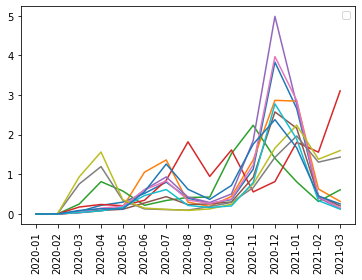

<Figure size 720x2160 with 0 Axes>

In [142]:
plt.plot(w_abs_time.T.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],rotation=90)
#ax.get_position()
plt.legend(loc="best")
plt.figure(figsize=(10,30))
plt.show()



## Time Line for worst FIPS 

## Sex, ethnic group and age of best against worst FIPS

## Scatter (patients and vaccinated) 

## Bars for ethnic groups 

## Heatmap 

## Regressions for sex, age and ethnic group 